# Titanic - Machine Learning from Disaster

__Predict survival on the Titanic and get familiar with ML basics__

_See more: https://www.kaggle.com/c/titanic_

__Legends__

| Variable   | Definition           | Key
|:---        |:---                  |:---
| survival   | Survival             | 0 = No, 1 = Yes
| pclass     |  Ticket class        |1 = 1st, 2 = 2nd, 3 = 3rd
| embarked   | Port of Embarkation  | C = Cherbourg, Q = Queenstown, S = Southampton


**Passenger fare**

| Class      | Price
|:---        |:---
| 1st        | between £30 and £870
| 2nd        | mean £13
| 3nd        | £3–£8

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from common import data_preparation

## Constants

In [2]:
PATH_TRAIN_CSV = "data/train.csv"
PATH_TEST_CSV = "data/test.csv"
PATH_PROCESSED_TRAIN_CSV = "data/processed_train.csv"
PATH_PROCESSED_TEST_CSV = "data/processed_test.csv"

## Getting the Data

In [3]:
df_train = pd.read_csv(PATH_TRAIN_CSV)
df_test = pd.read_csv(PATH_TEST_CSV)

__Show the first head rows of train dataset__

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Show the first head rows of test dataset__

In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Explore the data

### Show detail about features

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Percentage of missing data

In [8]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = df_train.isnull().sum() / df_train.isnull().count() * 100
percent = (round(percent, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent], keys=['Total', '%'], axis=1)
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [9]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = df_test.isnull().sum() / df_test.isnull().count() * 100
percent = (round(percent, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent], keys=['Total', '%'], axis=1)
missing_data.head(5)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0


### Describe train dataset

_here we can find some contradition in the data like noisiness and type of noise (stochastic, outliers, rounding errors, etc.)_

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Understanding "Sex" Feature

__Total between women and men__

In [12]:
df_train.groupby(["Sex"]).size().reset_index(name='Total')

,Sex,Total
0,female,314
1,male,577


In [13]:
df_test.groupby(["Sex"]).size().reset_index(name='Total')

,Sex,Total
0,female,152
1,male,266


__Survival rate by Sex and Age__

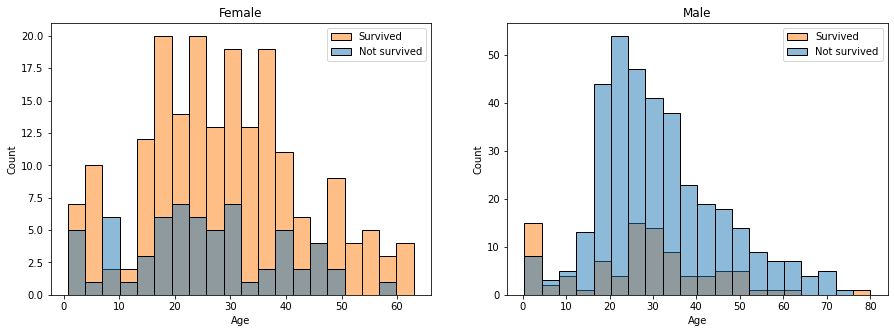

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

females = df_train[df_train["Sex"] == "female"]
males = df_train[df_train["Sex"] == "male"]

ax = sns.histplot(data=females, x="Age", hue="Survived", bins=20, ax=axes[0])
ax.legend(loc='upper right', labels=["Survived", "Not survived"])
ax.set_title("Female")

ax = sns.histplot(data=males, x="Age", hue="Survived", bins=20, ax=axes[1])
ax.legend(loc='upper right', labels=["Survived", "Not survived"])
_ = ax.set_title("Male")

__Survival rate by Sex and Class__

In [15]:
df_total_sex_pclass = df_train.groupby(["Sex", "Pclass"]).size().reset_index(name='Total')
df_non_survivor_sex_pclass = df_train[df_train["Survived"] == 0].groupby(["Sex", "Pclass"]).size().reset_index(name='Total')

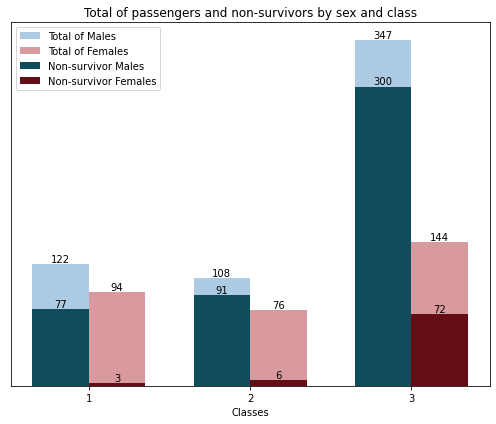

In [16]:
classes = df_total_sex_pclass["Pclass"].unique()

total_males = df_total_sex_pclass[df_total_sex_pclass["Sex"] == "male"]["Total"].values
total_females = df_total_sex_pclass[df_total_sex_pclass["Sex"] == "female"]["Total"].values
non_survivor_males = df_non_survivor_sex_pclass[df_non_survivor_sex_pclass.Sex == "male"]["Total"].values
non_survivor_females = df_non_survivor_sex_pclass[df_non_survivor_sex_pclass.Sex == "female"]["Total"].values

fig, ax = plt.subplots(figsize=(7, 6))

w_bar = 0.35
lb_loc = np.arange(len(classes))
colors = ["#adcbe3", "#d89a9e", "#0f4c5c", "#640d14"]

bar_total_males = ax.bar(lb_loc - w_bar/2, total_males, w_bar, label="Total of Males", color=colors[0])
bar_total_females = ax.bar(lb_loc + w_bar/2, total_females, w_bar, label="Total of Females", color=colors[1])
bar_non_survivor_males  = ax.bar(lb_loc - w_bar/2, non_survivor_males, w_bar, label="Non-survivor Males", color=colors[2])
bar_non_survivor_females = ax.bar(lb_loc + w_bar/2, non_survivor_females, w_bar, label="Non-survivor Females", color=colors[3])

ax.bar_label(bar_total_males)
ax.bar_label(bar_total_females)
ax.bar_label(bar_non_survivor_males)
ax.bar_label(bar_non_survivor_females)

#Add some text for labels, title and custom x-axis tick labels, etc.
ax.legend()
ax.set_yticks([])
ax.set_xticks(lb_loc, classes)

ax.set_xlabel("Classes")
ax.set_title("Total of passengers and non-survivors by sex and class")

fig.tight_layout()

__Survival rate by sex, class and embarked gate__

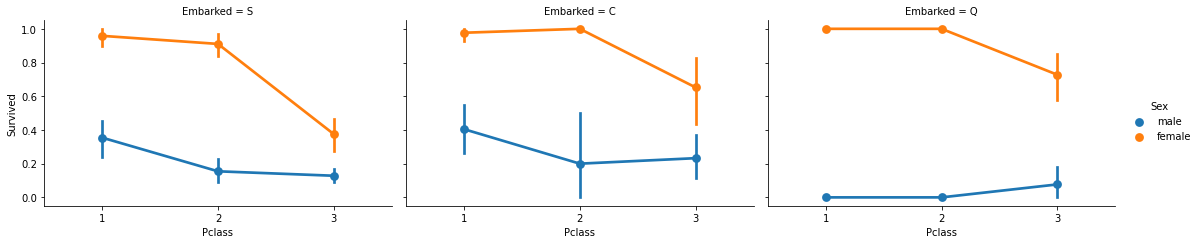

In [17]:
sns.catplot(
    data = df_train, 
    x="Pclass",  y="Survived", hue="Sex",  kind="point", col="Embarked", 
    col_wrap=3, height=3.5, aspect=1.5)

### Understanding "PCass" Feature

__Survival rate by class__

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

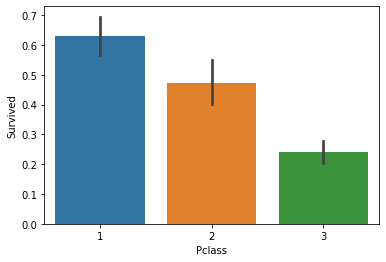

In [18]:
sns.barplot(data=df_train, x="Pclass", y="Survived")

### Understanding "SibSp" and "Parch" Feature

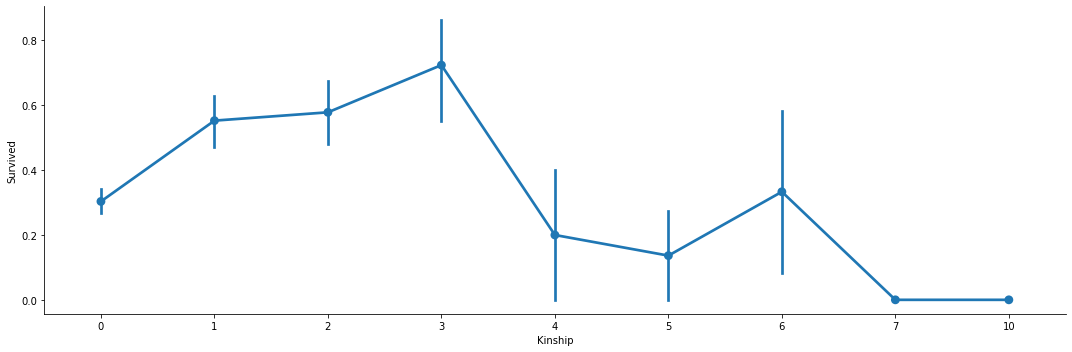

In [19]:
df_validation = df_train.copy()
df_validation["Kinship"] = df_validation["SibSp"] + df_validation['Parch']

_ = sns.catplot(data = df_validation, x="Kinship",  y="Survived", kind="point", aspect=3.0)

### Understanding "Fare" Feature

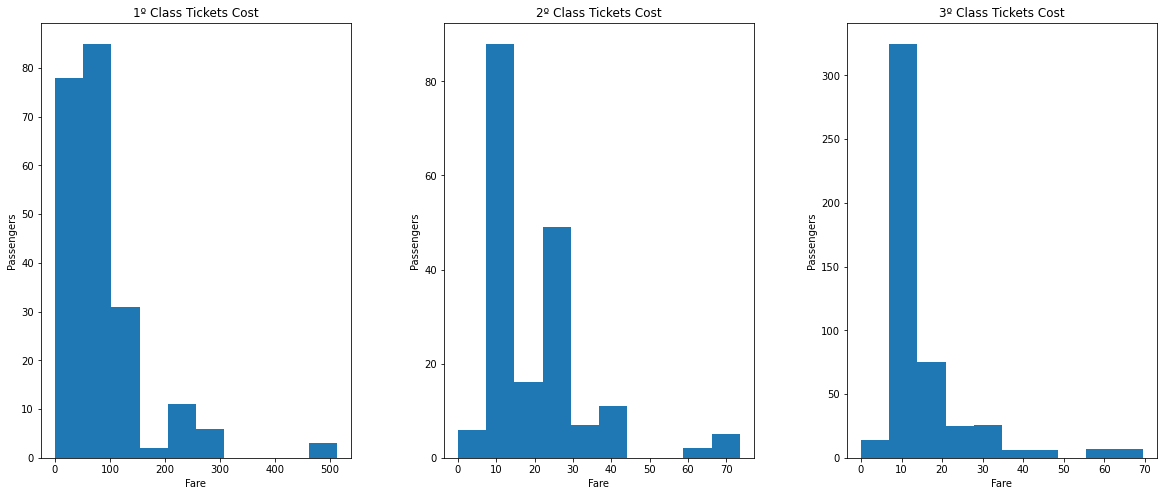

In [20]:
nclass = 3
fig, axes = plt.subplots(1, nclass, figsize=(20, 8))

for i in range(nclass):
    pclass = i + 1
    dataframe = df_train[df_train.Pclass == pclass]
    dataframe.hist(column="Fare", bins=10, ax=axes[i])
    
    axes[i].grid(False)
    axes[i].set_xlabel('Fare')
    axes[i].set_ylabel('Passengers')
    axes[i].set_title('{}º Class Tickets Cost'.format(pclass))

__Shows passengers who paid the most tickets grouped by class__

In [21]:
def lsmx_fare(dataframe, pclass):
    """
    List all passengers who have  paid the maximum ticket price per class.
    """
    dfclass = dataframe[dataframe.Pclass == pclass]
    maxfare = dfclass.Fare.max()
    return dfclass[dfclass.Fare == maxfare]

In [22]:
pd.concat([
    lsmx_fare(df_train, 1),
    lsmx_fare(df_train, 2),
    lsmx_fare(df_train, 3)
])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [23]:
pd.concat([
    lsmx_fare(df_test, 1),
    lsmx_fare(df_test, 2),
    lsmx_fare(df_test, 3)
])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
212,1104,2,"Deacon, Mr. Percy William",male,17.0,0,0,S.O.C. 14879,73.5000,NaN,S
352,1244,2,"Dibden, Mr. William",male,18.0,0,0,S.O.C. 14879,73.5000,NaN,S
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,NaN,S
342,1234,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN,S
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.5500,NaN,S


### 4. Prepare the data

What are you find here?

- _Keep the original dataset intact, Work on copies of it_.
- _Write functions for all data transformations you apply_.
- _Data cleaning_.
- _Feature selection (optional)_.
- _Feature engineering, where appropriates_.
- _Feature scaling: standardize or normalize features_.

**Create copies of dataset**

In [24]:
df_proc_train = df_train.copy()
df_proc_test = df_test.copy()

__Add "Title" feature of each passengers__

In [25]:
data_preparation.add_title(df_proc_train)
data_preparation.add_title(df_proc_test)

__Add "FamilyName" feature of each passengers__

In [26]:
data_preparation.add_family_name(df_proc_train)
data_preparation.add_family_name(df_proc_test)

__Create Kinship from SibSp and Parch__

In [27]:
dataset = [df_proc_train, df_proc_test]
for data in dataset:
    data["Kinship"] = data["SibSp"] + data['Parch']

__Create Deck from Cabin__

In [28]:
dataset = [df_proc_train, df_proc_test]

for data in dataset:
    data["Cabin"].fillna("Z0", inplace=True)
    data["Deck"] = df_proc_train["Cabin"].str.extract(r'([a-zA-Z]+)')

__Change Deck categorical attribute. "A"=1, "B"=2, "C"=3, "D"=4, "E"=5, "F"=6, "G"=7, "Z"=8__

In [29]:
df_proc_train.Deck = LabelEncoder().fit_transform(df_proc_train.Deck)
df_proc_test.Deck = LabelEncoder().fit_transform(df_proc_test.Deck)

__Create alone attribute to represent passengers who traveled by yourself__

In [30]:
dataset = [df_proc_train, df_proc_test]

for data in dataset:
    data.loc[data["Kinship"] > 0, "Alone"] = 0
    data.loc[data["Kinship"] == 0, "Alone"] = 1
    data["Alone"] = data["Alone"].apply(np.int64)

**Join the train and test dataframe to do some data preparation**

In [31]:
frames = [df_proc_train.drop("Survived", axis=1), df_proc_test]
df_complete = pd.concat(frames)

**Set NaN Age with its mean**

_Its consider complete dataframe mean age._

In [32]:
age_mean = int(df_complete["Age"].mean())
print("Mean age:", age_mean)

dataset = [df_proc_train, df_proc_test]
for data in dataset:
    data_preparation.fill_age(data, age_mean) 

Mean age: 29


__Defines interval that groups passengers in approximate age__

In [33]:
df_proc_train["AgeGroup"] = data_preparation.get_age_group(df_proc_train)
df_proc_test["AgeGroup"] = data_preparation.get_age_group(df_proc_test)

__Change AgeGroup attribute. ADULT=0, CHILD=1, ELDERLY=2, TEENAGER=3, YOUNG_ADULT=4__

In [34]:
df_proc_train.AgeGroup = LabelEncoder().fit_transform(df_proc_train.AgeGroup)
df_proc_test.AgeGroup = LabelEncoder().fit_transform(df_proc_test.AgeGroup)

__Change Sex categorical attribute. female=0, male=1__

In [35]:
df_proc_train.Sex = LabelEncoder().fit_transform(df_proc_train.Sex)
df_proc_test.Sex = LabelEncoder().fit_transform(df_proc_test.Sex)

__Change Embarked categorical attribute. C=0, Q=1, S=2__

In [36]:
df_proc_train.Embarked = LabelEncoder().fit_transform(df_proc_train.Embarked)
df_proc_test.Embarked = LabelEncoder().fit_transform(df_proc_test.Embarked)

__Code Ticket Identification to a number representation__

In [37]:
df_proc_train.Ticket = LabelEncoder().fit_transform(df_proc_train.Ticket)
df_proc_test.Ticket = LabelEncoder().fit_transform(df_proc_test.Ticket)

__Code Title to a number representation__

In [38]:
df_proc_train.Title = LabelEncoder().fit_transform(df_proc_train.Title)
df_proc_test.Title = LabelEncoder().fit_transform(df_proc_test.Title)

__Code FamilyName to a number representation__

In [39]:
df_proc_train.FamilyName = LabelEncoder().fit_transform(df_proc_train.FamilyName)
df_proc_test.FamilyName = LabelEncoder().fit_transform(df_proc_test.FamilyName)

__Share Fare with everyone related to the Ticket__

In [40]:
dataset = [df_proc_train, df_proc_test]
for data in dataset:
    data_preparation.share_fare(data)

__Set NaN Fare with its median in PClass__

In [41]:
dataset = [df_proc_train, df_proc_test]
for data in dataset:
    data_preparation.fill_fare(data)

__Feature selection__

In [42]:
df_proc_train.drop(["PassengerId", "Name", "Cabin"], axis=1, inplace=True)
df_proc_test.drop(["Name", "Cabin"], axis=1, inplace=True)

__New Train datase after data preparation__

In [43]:
df_proc_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyName,Kinship,Deck,Alone,AgeGroup
0,0,3,1,22.0,1,0,523,7.25,2,2,73,1,8,0,0
1,1,1,0,38.0,1,0,596,71.28,0,3,136,1,2,0,0
2,1,3,0,26.0,0,0,669,7.92,2,1,251,0,8,1,0
3,1,1,0,35.0,1,0,49,26.55,2,3,198,1,2,0,0
4,0,3,1,35.0,0,0,472,8.05,2,2,11,0,8,1,0


In [44]:
df_proc_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyName,Kinship,Deck,Alone,AgeGroup
0,892,3,1,34.5,0,0,152,7.83,1,2,172,0,8,1,0
1,893,3,0,47.0,1,0,221,7.00,2,3,339,1,2,0,0
2,894,2,1,62.0,0,0,73,9.69,1,2,231,0,8,1,2
3,895,3,1,27.0,0,0,147,8.66,2,2,344,0,2,1,0
4,896,3,0,22.0,1,1,138,12.29,2,3,150,2,8,0,0


__Save Dataframe with promising transformations__

In [45]:
df_proc_train.to_csv(PATH_PROCESSED_TRAIN_CSV, index=False)
df_proc_test.to_csv(PATH_PROCESSED_TEST_CSV, index=False)